# GOTV.ML

## 2. Exploratory Data Analysis

### Importing Python Modules/Libraries

All systems/configurations:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

path = ""

Google Colab: 

In [2]:
# Uncomment cell if using Google Colab

from google.colab import drive
drive.mount("/content/drive")

path = "/content/drive/My Drive/csc-461-final-project/"

Mounted at /content/drive


In [3]:
Statewide = pd.read_csv(path + "data/Statewide.csv")
Statewide.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8,TGT STATEWIDE PRIMARY,TGT PARTY AFFILIATION
0,6,2921,1,1962,1,1,1,0,1,1,3,0,2,0,0
1,6,2920,2,1984,0,1,0,0,0,0,0,0,0,0,0
2,32,2878,3,1968,1,1,0,1,1,1,0,3,3,1,3
3,32,2878,3,1962,1,1,0,1,1,0,0,3,0,1,3
4,34,2889,3,1996,0,1,0,0,0,0,0,0,0,0,0


In [4]:
Statewide.shape[0]

816297

In [5]:
Statewide.shape[1] - 2

13

In [6]:
election_ftr_list = ["ELECTION 3", "ELECTION 4", "ELECTION 5", "ELECTION 6", "ELECTION 7", "ELECTION 8"]
turnout_prop = Statewide[election_ftr_list].apply(lambda x: pd.value_counts(x, normalize = True))
display(turnout_prop)

,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8
0,0.871977,0.380928,0.889092,0.848401,0.5608,0.821962
1,0.128023,0.619072,0.110908,0.151599,0.4392,0.178038


In [7]:
target_list = ["TGT STATEWIDE PRIMARY"]
turnout_prop = Statewide[target_list].apply(lambda x: pd.value_counts(x, normalize = True))
display(turnout_prop)

,TGT STATEWIDE PRIMARY
0,0.831451
1,0.168549


In [10]:
target_list = ["TGT PARTY AFFILIATION"]
turnout_prop = Statewide[target_list].apply(lambda x: pd.value_counts(x, normalize = True))
display(turnout_prop)

,TGT PARTY AFFILIATION
0,0.832116
2,0.141458
3,0.026264
1,0.000162


In [9]:
target_list = ["TGT PARTY AFFILIATION"]
turnout_prop = Statewide[target_list].mask(lambda x: x.eq(0)).apply(lambda x: pd.value_counts(x, normalize = True))
display(turnout_prop)

,TGT PARTY AFFILIATION
2.0,0.842597
3.0,0.156440
1.0,0.000963


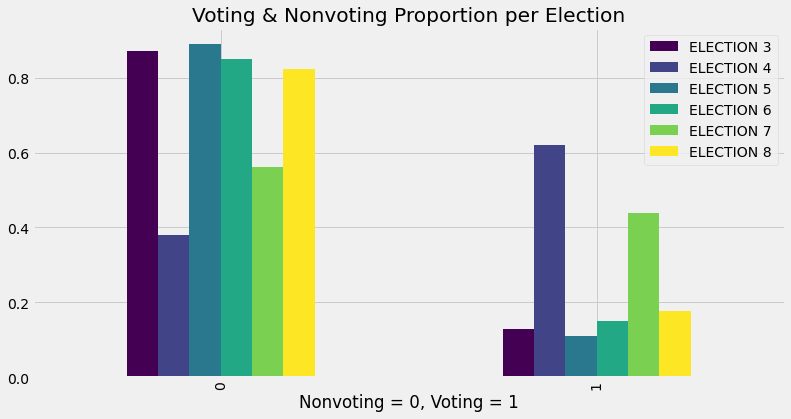

In [ ]:
turnout_prop.plot(kind="bar", colormap="viridis", figsize=(12, 6), title = "Voting & Nonvoting Proportion per Election", xlabel = "Nonvoting = 0, Voting = 1")
# yaxis label

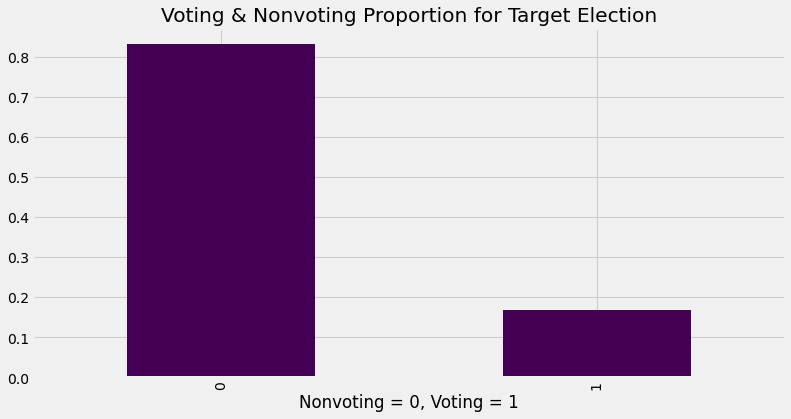

In [ ]:
Statewide["TGT STATEWIDE PRIMARY"].value_counts(normalize = True).plot(kind="bar", colormap="viridis", figsize=(12, 6), title = "Voting & Nonvoting Proportion for Target Election", xlabel = "Nonvoting = 0, Voting = 1")

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

TGT STATEWIDE PRIMARY       0      1
ELECTION 3                          
0                      628043  83749
1                       50668  53837
p-value: 0.0
Cramer's V: 0.35477701328821576


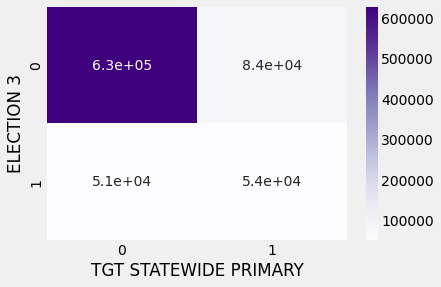

In [ ]:
election_tgt = pd.crosstab(Statewide["ELECTION 3"], Statewide['TGT STATEWIDE PRIMARY'])
print(election_tgt)
sns.heatmap(election_tgt, annot = True, cmap = "Purples")
c, p, dof, expected = chi2_contingency(election_tgt)
print("p-value: " + str(p))
cramer = association(election_tgt, method = "cramer")
print("Cramer's V: " + str(cramer))

Expected:


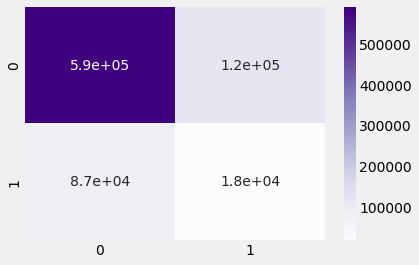

In [ ]:
sns.heatmap(expected, annot = True, cmap = "Purples")
print("Expected:")

TGT STATEWIDE PRIMARY       0       1
ELECTION 4                           
0                      301144    9806
1                      377567  127780
p-value: 0.0
Cramer's V: 0.28709914045911733


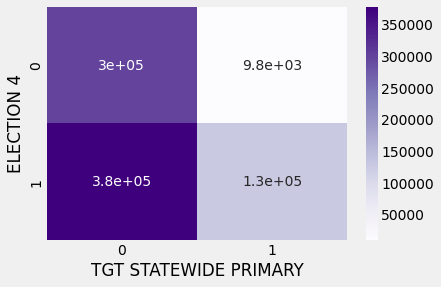

In [ ]:
election_tgt = pd.crosstab(Statewide["ELECTION 4"], Statewide['TGT STATEWIDE PRIMARY'])
print(election_tgt)
sns.heatmap(election_tgt, annot = True, cmap = "Purples")
c, p, dof, expected = chi2_contingency(election_tgt)
print("p-value: " + str(p))
cramer = association(election_tgt, method = "cramer")
print("Cramer's V: " + str(cramer))

Expected:


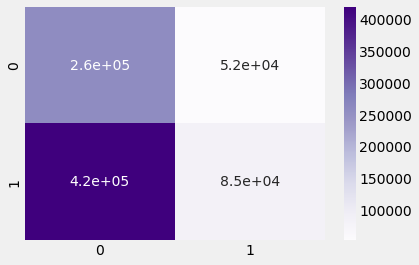

In [ ]:
sns.heatmap(expected, annot = True, cmap = "Purples")
print("Expected:")

TGT STATEWIDE PRIMARY       0      1
ELECTION 5                          
0                      642153  83610
1                       36558  53976
p-value: 0.0
Cramer's V: 0.4034711282924021


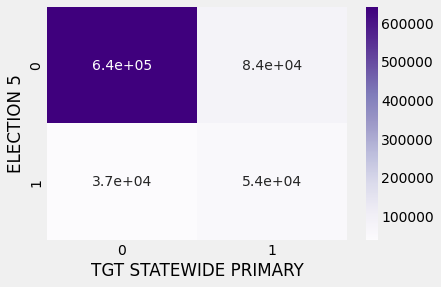

In [ ]:
election_tgt = pd.crosstab(Statewide["ELECTION 5"], Statewide['TGT STATEWIDE PRIMARY'])
print(election_tgt)
sns.heatmap(election_tgt, annot = True, cmap = "Purples")
c, p, dof, expected = chi2_contingency(election_tgt)
print("p-value: " + str(p))
cramer = association(election_tgt, method = "cramer")
print("Cramer's V: " + str(cramer))

Expected:


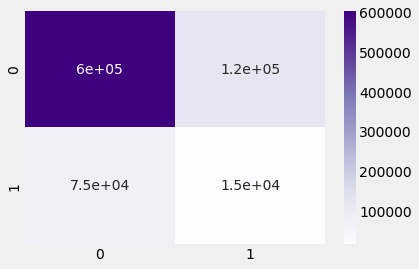

In [ ]:
sns.heatmap(expected, annot = True, cmap = "Purples")
print("Expected:")

TGT STATEWIDE PRIMARY       0      1
ELECTION 6                          
0                      615931  76616
1                       62780  60970
p-value: 0.0
Cramer's V: 0.36601295253302196


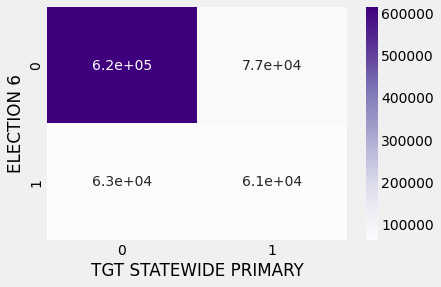

In [ ]:
election_tgt = pd.crosstab(Statewide["ELECTION 6"], Statewide['TGT STATEWIDE PRIMARY'])
print(election_tgt)
sns.heatmap(election_tgt, annot = True, cmap = "Purples")
c, p, dof, expected = chi2_contingency(election_tgt)
print("p-value: " + str(p))
cramer = association(election_tgt, method = "cramer")
print("Cramer's V: " + str(cramer))

Expected:


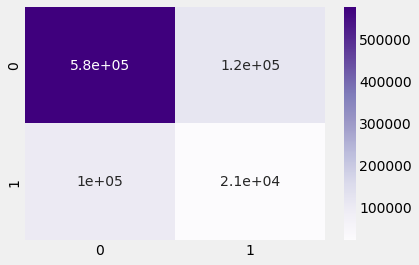

In [ ]:
sns.heatmap(expected, annot = True, cmap = "Purples")
print("Expected:")

TGT STATEWIDE PRIMARY       0       1
ELECTION 7                           
0                      434000   23779
1                      244711  113807
p-value: 0.0
Cramer's V: 0.3519711143222069


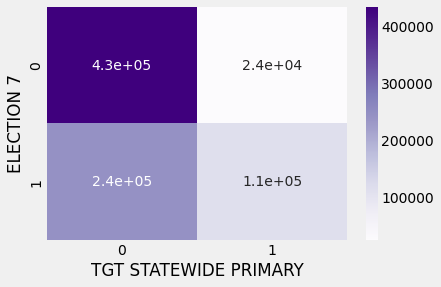

In [ ]:
election_tgt = pd.crosstab(Statewide["ELECTION 7"], Statewide['TGT STATEWIDE PRIMARY'])
print(election_tgt)
sns.heatmap(election_tgt, annot = True, cmap = "Purples")
c, p, dof, expected = chi2_contingency(election_tgt)
print("p-value: " + str(p))
cramer = association(election_tgt, method = "cramer")
print("Cramer's V: " + str(cramer))

Expected:


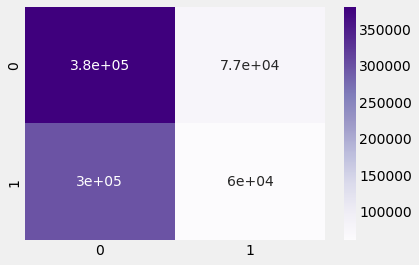

In [ ]:
sns.heatmap(expected, annot = True, cmap = "Purples")
print("Expected:")

TGT STATEWIDE PRIMARY       0      1
ELECTION 8                          
0                      611814  59151
1                       66897  78435
p-value: 0.0
Cramer's V: 0.46141801283854594


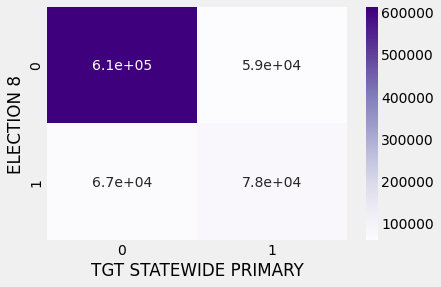

In [ ]:
election_tgt = pd.crosstab(Statewide["ELECTION 8"], Statewide['TGT STATEWIDE PRIMARY'])
print(election_tgt)
sns.heatmap(election_tgt, annot = True, cmap = "Purples")
c, p, dof, expected = chi2_contingency(election_tgt)
print("p-value: " + str(p))
cramer = association(election_tgt, method = "cramer")
print("Cramer's V: " + str(cramer))

Expected:


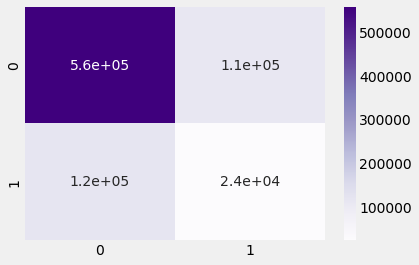

In [ ]:
sns.heatmap(expected, annot = True, cmap = "Purples")
print("Expected:")

TGT STATEWIDE PRIMARY       0      1
CURRENT PARTY                       
1                      341418  21396
2                      242410  98209
3                       94883  17981
p-value: 0.0
Cramer's V: 0.28439745758185


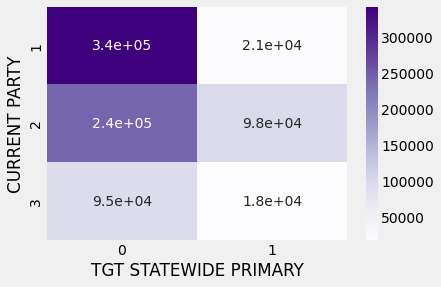

In [ ]:
election_tgt = pd.crosstab(Statewide["CURRENT PARTY"], Statewide['TGT STATEWIDE PRIMARY'])
print(election_tgt)
sns.heatmap(election_tgt, annot = True, cmap = "Purples")
c, p, dof, expected = chi2_contingency(election_tgt)
print("p-value: " + str(p))
cramer = association(election_tgt, method = "cramer")
print("Cramer's V: " + str(cramer))

Expected:


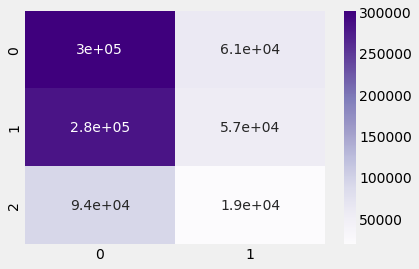

In [ ]:
sns.heatmap(expected, annot = True, cmap = "Purples")
print("Expected:")